# Task 1

In [21]:
!pip install pgmpy

### Task 1 Part1

In [22]:
#importing necessary packages
import pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD as tcpd
import pylab as plt
import networkx as nx
from pgmpy.inference import VariableElimination

In [23]:
#building the graph values
graph_model = BayesianModel([('asia', 'tub'),('tub', 'either'),('smoke', 'lung'), ('smoke', 'bronc'),  ('lung', 'either'), ('either', 'xray'), ('either', 'dysp'),('bronc', 'dysp')])

asia = tcpd(variable='asia', variable_card = 2, 
                      values = [[0.01], [0.99]])
smoke = tcpd(variable='smoke', variable_card = 2, 
                       values = [[0.5], [0.5]])
tub = tcpd(variable='tub', variable_card=2, 
                     values=[[0.05, 0.01],[0.95, 0.99]], 
                     evidence = ['asia'], evidence_card = [2])
lung = tcpd(variable='lung', variable_card=2,
                      values=[[0.1, 0.01],[0.9, 0.99]], 
                      evidence = ['smoke'], evidence_card = [2])
bronc = tcpd(variable='bronc', variable_card=2, 
                       values=[[0.6, 0.3],[0.4, 0.7]], 
                       evidence = ['smoke'], evidence_card = [2])
either = tcpd(variable='either', variable_card=2, 
                        values=[[1, 1, 1, 0],[0, 0, 0, 1]], 
                        evidence = ['tub', 'lung'], evidence_card = [2, 2])
xray = tcpd(variable='xray', variable_card=2, 
                      values=[[0.98, 0.05],[0.02, 0.95]], 
                      evidence = ['either'], evidence_card = [2])

dysp = tcpd(variable='dysp', variable_card=2, 
                      values=[[0.9, 0.7, 0.8, 0.1],[0.1, 0.3, 0.2, 0.9]], 
                      evidence = ['bronc', 'either'], evidence_card = [2, 2])


graph_model.add_cpds(asia,smoke,tub,lung,bronc,either,xray,dysp)

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


Moral Graph, Triangulated graph, Junction tree

In [24]:
#setting the graph functions
moral_graph = graph_model.to_markov_model()
triangulated_graph = moral_graph.triangulate()
junc_tree_graph = triangulated_graph.to_junction_tree()

Display Moral graph

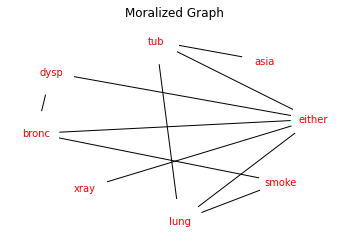

In [25]:
#plotting moral graph
plt.figure()
plt.title('Moralized Graph')
nx.draw(moral_graph, with_labels=True, node_color= 'w', node_size=2000, font_size=10, font_color='red')
plt.savefig('Moralize.png')
plt.show()

Display Triangulated Graph

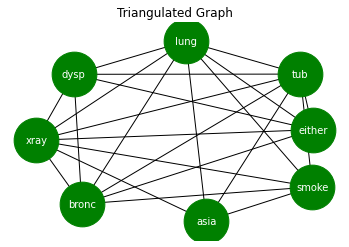

In [26]:
#plotting triangulated graph
plt.figure()
plt.title('Triangulated Graph')
nx.draw(triangulated_graph, with_labels=True, node_color= 'g', node_size=2000, font_size=10, font_color='white')
plt.savefig('Triangulate.png')
plt.show()

Display Junction Tree

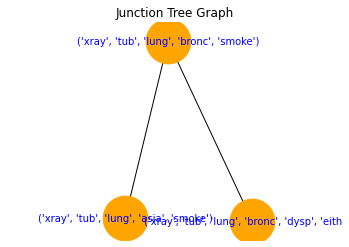

In [27]:
#plotting junction tree
pos = nx.spring_layout(junc_tree_graph)   
plt.figure()
plt.title('Junction Tree Graph')
nx.draw(junc_tree_graph, with_labels=True, node_color= 'orange', node_size=2000, font_size=10, font_color='blue')
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.8
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.savefig('juncTree.png')
plt.show()

### Task 1 Part 2

For two clusters, if there exists a common node in both clusters, the Running intersection property is satisfied if the common node is present in all possible clusters between the two clusters.\
Here in our clusters:
{'xray', 'bronc', 'smoke', 'lung', 'tub'}, {'xray', 'tub', 'lung', 'asia', 'smoke'}, {'xray', 'tub', 'lung', 'bronc', 'dysp', 'either'} -   
{'xray', 'tub', 'lung'} exists in every cluster. \
 Thus junction tree satisfies the running intersection property.

# Task 2

### Task 2 Part 1

$$p(V) = p(A) p(T | A) p(S) p(L | S) p(B | S) p(E | T, L) p(D | E, B) p(X | E)$$<br>
Considering all events of the random variables, the left side is the joint probability. Right side is the chain rule product of all individual indipendencies and the CPD's. The joint probability distribution increases exponentially as the number of variables increases. The distribution in the right side is done by variable elimination method; thus doing marginalization over small factors. Hence marginalization is basically computing the product of all factors having variables and marginalize them if they have to be eliminated.

### Task 2 Part 2

The message passing algorithm basically sends the message between clusters. There exists a 'seperation set' between clusters, which are collectively the common variables between the nodes of clusters. Each cluster sends a message and computes the 'marginal density' of the same. 

####Node 1: {'xray', 'bronc', 'smoke', 'lung', 'tub'}
####Node 2: {'xray', 'tub', 'lung', 'asia', 'smoke'}
####Node 3: {'xray', 'tub', 'lung', 'bronc', 'dysp', 'either'}


## Equation : 
$$p(V) = p(A) p(T | A) p(S) p(L | S) p(B | S) p(E | T, L) p(D | E, B) p(X | E)$$<br>

###Iteration 1 : 
Initially message will be passed from Node 1 to Node 2 (since Node 1 is a leaf node). 'bronc' is the only uncommon element. So we marginalize over 'bronc'. 
$$\Psi_{1}(X, T, L, S) = \sum_{B} p(B | S)$$<br>

###Iteration 2 : 
Then the message is passed from Node 2 to Node 3. We marginalize over 'asia', 'smoke', since they are the uncommon elements.
$$\Psi_{2}(X, T, L) = \sum_{A, S} p(A) p(T | A)p(S)p(L|S) \Psi_{1}(X, T, L, S) $$ <br>

###Iteration 3 : 
After Iteration 3, it propagates back to Node 1, so that all clusters have marginals.
$$\Psi_{3} = \sum_{T, S, A, X, D, B} p(E|T,L) p(E | T, L)p(X|E) \Psi_{2}(X, T, L)$$ <br>


which gives the original equation - $$p(V) = p(A) p(T | A) p(S) p(L | S) p(B | S) p(E | T, L) p(D | E, B) p(X | E)$$<br>

So message passing algorithm gives cluster marginals.

### Task 2 Part 3

In [ ]:
model_inference = VariableElimination(graph_model)
query = model_inference.query(variables=['tub', 'lung','bronc'],evidence={'asia': 0, 'xray': 0}, joint= True)
#print('The Joint Probability for {tub, lung, bronc} for the given evidence is ' + str(query))
print(str(query))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------+---------+----------+-----------------------+
| tub    | lung    | bronc    |   phi(tub,lung,bronc) |
+========+=========+==========+=======================+
| tub(0) | lung(0) | bronc(0) |                0.0106 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(0) | bronc(1) |                0.0079 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(0) |                0.1413 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(1) |                0.1778 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(0) |                0.2021 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(1) |                0.1508 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(0) |                0.1370 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(1) |                0

The probability of tub(0), lung(0), bronc(0) with asia and xray - 0 is 0.0106

## References
1. Pattern Classificaiton book by Duda, Hart, Stork
2. https://en.wikipedia.org/wiki/Belief_propagation
3. https://pgmpy.org/
4. Building Probabilistic Graphical Models with Python